In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.tree import plot_tree

In [4]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [50]:
df2 = df[ df['workclass'] != "?" ]
df3 =  df2[ df2['occupation'] != "?" ]
df4 =  df3[ df3['native.country'] != "?" ]
df4

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [60]:
X=df4.apply(LabelEncoder().fit_transform)
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,65,2,6096,11,8,6,3,1,4,0,0,89,17,38,0
3,37,2,6564,5,3,0,6,4,4,0,0,88,39,38,0
4,24,2,15770,15,9,5,9,3,4,0,0,88,39,38,0
5,17,2,13278,11,8,0,7,4,4,0,0,87,44,38,0
6,21,2,7296,0,5,5,0,4,4,1,0,87,39,38,0


In [52]:
df4.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [64]:
N = X.drop(columns=['income'], axis=1)
T=X['income']
x_train,x_test,y_train,y_test = train_test_split(N,T)

In [65]:
model = DecisionTreeClassifier(criterion = "gini")
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [66]:
train_score1 = model.score(x_train, y_train)
test_score2 = model.score(x_test, y_test)
print(train_score1)
print(test_score2)

1.0
0.8087786765680944


In [67]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=8, min_samples_leaf=4)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, random_state=100)

In [68]:
plot_tree?

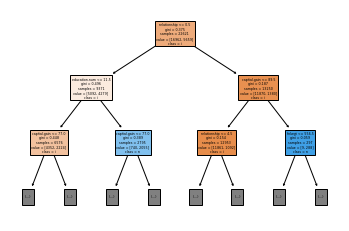

In [78]:
Z=plot_tree(model,feature_names = df4.columns[:-1], class_names = df4.columns[-1], filled = True, max_depth=2)
